In [ ]:
# Looking at the movie (1986-2016) dataset from Kaggle to see if I can determine what factors determine a movie's success

In [116]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuraton of plots


In [117]:
# Read in the data

df = pd.read_csv(r'C:\Users\sshre\Downloads\movies.csv')

In [118]:
# looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [119]:
# Checking for null values

for col in df.columns:
    print(col," - ",np.sum(df[col].isnull()))

name  -  0
rating  -  77
genre  -  0
year  -  0
released  -  2
score  -  3
votes  -  3
director  -  0
writer  -  3
star  -  1
country  -  3
budget  -  2171
gross  -  189
company  -  17
runtime  -  4


In [120]:
#Handling null values

df.dropna(inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [121]:
#Datatypes of each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [122]:
#Changing Data types to int for Votes, Budget and Gross
df['votes']=df['votes'].astype('int64')
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [123]:
# Fetching year from 'released' column due to mismatch in data in 'released' & 'year' columns

df['releaseyear'] = df['released'].astype(str).str[-20:-16]

In [137]:
#Sorting movies based on gross collections
df = df.sort_values(by=['gross'],inplace=False,ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseyear
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,65
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,75
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,52
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,71
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,74


In [126]:
#Dropping duplicate rows
df=df.drop_duplicates()

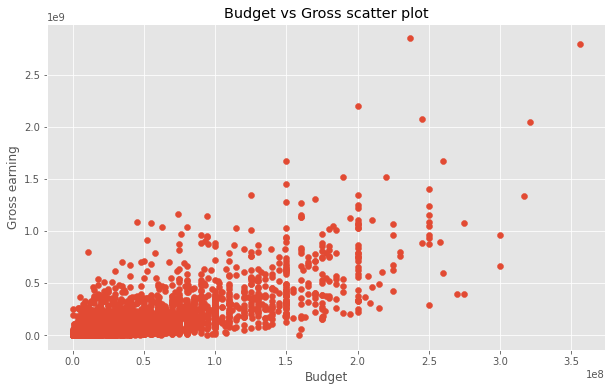

In [127]:
#Checking for a possible correlation between budget and gross income

plt.figure(figsize=(10,6))
plt.scatter(x = df['budget'],y = df['gross'])
plt.title("Budget vs Gross scatter plot")
plt.xlabel("Budget")
plt.ylabel("Gross earning")
plt.show()

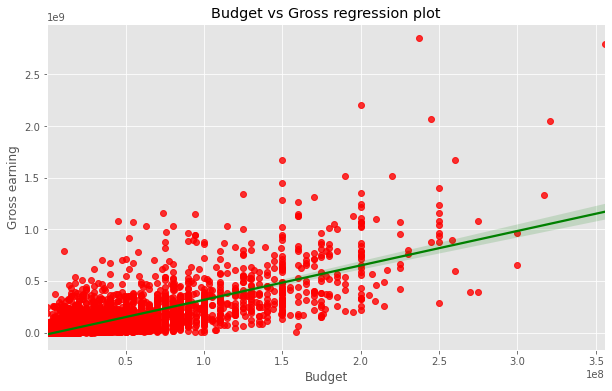

In [128]:
#Budget vs Gross using regplot

plt.figure(figsize=(10,6))
sns.regplot(x = df['budget'], y = df['gross'], data=df,scatter_kws={"color":"red"},line_kws={"color":"green"})
plt.title("Budget vs Gross regression plot")
plt.xlabel("Budget")
plt.ylabel("Gross earning")
plt.show()

In [129]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Text(69.0, 0.5, 'Movie Features')

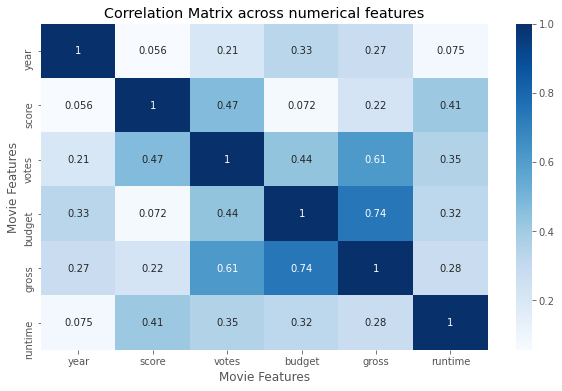

In [130]:
cormax=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cormax,annot=True,cmap="Blues")
plt.title("Correlation Matrix across numerical features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [131]:
#Encoding Categorical Data

df_converted=df

for i in df_converted.columns:
    if(df_converted[i].dtype=="object"):
        df_converted[i]=df_converted[i].astype("category")
        df_converted[i]=df_converted[i].cat.codes
        
df_converted.head()       

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseyear
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,65
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,75
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,52
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,71
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,74


Text(87.0, 0.5, 'Movie Features')

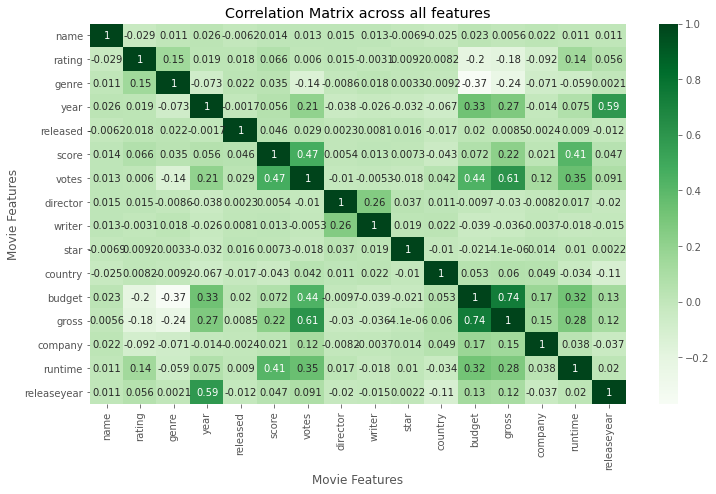

In [132]:
#New correlation

cormax2=df_converted.corr()
plt.figure(figsize=(12,7))
sns.heatmap(cormax2,annot=True,cmap="Greens")
plt.title("Correlation Matrix across all features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [133]:
corpairs = df_converted.corr()
corpairs = corpairs.unstack()
sorted_corpairs = corpairs.sort_values()
sorted_corpairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
releaseyear  country       -0.112459
country      releaseyear   -0.112459
company      rating        -0.092357
rating       company       -0.092357
genre        year          -0.073167
year         genre         -0.073167
company      genre         -0.071334
genre        company       -0.071334
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
budget       writer        -0.039466
year         director      -0.038354
d

In [134]:
highestcor = sorted_corpairs[(sorted_corpairs)>0.5]
highestcor

releaseyear  year           0.587340
year         releaseyear    0.587340
votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
releaseyear  releaseyear    1.000000
dtype: float64

In [135]:
# Votes and budget have a high correlation to Gross earning.